# Data Cleaning along with Basic EDA

In [1]:
import re #Regular Expression package
import pandas as pd #Pandas dataframes and etc.
import os #Used for shell commands
import numpy as np #NUmpy package
import matplotlib.pyplot as plt #Matplotlib graphing package
%matplotlib inline
import nltk #NLTK NLP Package
from nltk.tokenize import word_tokenize #NLTK NLP Package
np.random.seed(0)
from nltk.corpus import gutenberg, stopwords #NLTK NLP Package
from nltk.collocations import * #NLTK NLP Package
from nltk import FreqDist #NLTK NLP Package
from nltk import word_tokenize #NLTK NLP Package
from nltk.stem.porter import * #NLTK Stemming
from nltk.stem import WordNetLemmatizer #NLTK Lemmatization
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #WordCloud Package
from PIL import Image ##WordCloud Package assistance for WSJ image

Now that we have all the data; it must be cleaned. The following sections split the bag into positive and negative values and cleans each of these values. To clean the text data, the following process was used:
1. Loading the text  
2. Split the tokens  
3. Convert to lowercase 
4. Remove punctation 
5. Filter out remaining tokens that are not alphabetical words
6. Filter out any other stop words or useless cahracters.  

In addtion, once the data was cleaned we will look at the most common words used on negative vs. positive days.


In [2]:
df=pd.read_csv('January-October') #Loading data

In [3]:
df.isna().sum()

Date      0
Text      0
Change    0
Coded     0
dtype: int64

In [4]:
positive=df[df['Coded']==1]#split into negative and positive labels
negative=df[df['Coded']==-1]

In [5]:
stopwords_list = stopwords.words('english') #Stop words from english language
stopwords_list += list(string.punctuation) #String characters 
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',"’", '‘','said','says', "'s",'”','“'] #Miscelleneous and numerical characters 

In [6]:
stopwords.words('english') #Printed the stopwords to see what is included

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
stopwords_lowercase=['i','me','my','myself','we','our','ours','ourselves',
 'you', "you're", "you've", "you'll","you'd", 'your','yours', 'yourself',
'yourselves', 'he','him','his', 'himself','she', "she's",
 'her', 'hers','herself','it', "it's",'its', 'itself','they', 'them','their', 'theirs',
 'themselves','what', 'which','who', 'whom','this', 'that',
 "that'll", 'these','those', 'am','is', 'are','was', 'were',
 'be', 'been','being', 'have', 'has', 'had','having', 'do',
 'does', 'did','doing', 'a', 'an', 'the','and', 'but',
 'if', 'or','because','as','until', 'while','of','at','by', 'for','with','about','against',
 'between','into','through','during', 'before','after','above','below',
 'to','from','up','down', 'in','out','on','off',
 'over','under','again','further', 'then','once','here','there',
 'when','where','why','how', 'all','any','both','each', 'few','more',
 'most','other', 'some','such', 'no','nor', 'not','only',
 'own','same', 'so','than', 'too','very', 's','t',
 'can','will','just','don', "don't",'should', "should've",'now',
 'd','ll', 'm','o', 're','ve', 'y','ain',
 'aren',"aren't", 'couldn',"couldn't", 'didn',"didn't", 'doesn',"doesn't",
 'hadn',"hadn't", 'hasn',"hasn't", 'haven',"haven't", 'isn',"isn't",
 'ma','mightn', "mightn't",'mustn', "mustn't",'needn', "needn't",'shan',
 "shan't",'shouldn',"shouldn't",'wasn',"wasn't",
 'weren',"weren't", 'won',"won't", 'wouldn',"wouldn't"]

In [8]:
for x in stopwords_lowercase: #Decided to include a for loop to capatilize the stop words due to capitalization in headings. 
    stopwords_list.append(x.capitalize())

In [9]:
tokenized_positive=positive['Text'].apply(nltk.word_tokenize) #Tokenizing 
tokenized_negative=negative['Text'].apply(nltk.word_tokenize)

In [10]:
positive_tokens=[] #Use this to take out all of the stop words 
for x in tokenized_positive:
    for y in x:
        if y not in stopwords_list:
            positive_tokens.append(y.lower())

In [11]:
FreqDist_positive=dict(FreqDist(positive_tokens).most_common(10)) #Freq Dist of the token values for positive values

In [12]:
negative_tokens=[] #Use this to take out all of the stop words 
for x in tokenized_negative:
    for y in x:
        if y not in stopwords_list:
            negative_tokens.append(y.lower())

In [13]:
FreqDist_negative=dict(FreqDist(negative_tokens).most_common(10)) #Freq Dist of the token values for negative values

Now that we have a dictionary of word counts and the top ten words. Let's take a look at the results of each. Lets note any words that do not show up in one vs. the other. I imagine that the words will be similar for both. 

Text(0.5, 1.0, 'Positive S&P 500 Top 10 Word Vectors January')

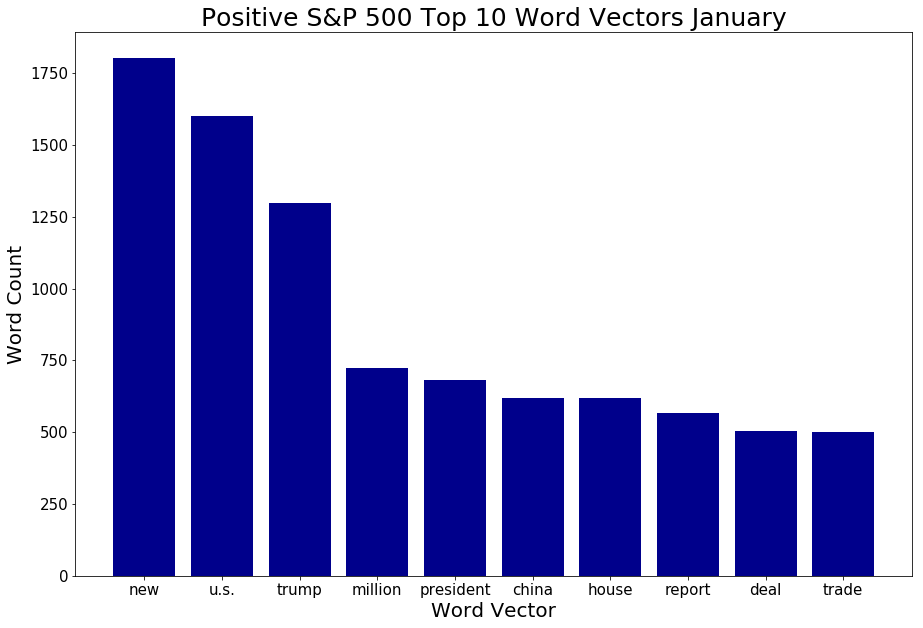

In [17]:
plt.figure(figsize=(15,10)) #Figsize
plt.bar(x=FreqDist_positive.keys(),
        height=FreqDist_positive.values(),
        color='darkblue') #Bar graph
plt.tick_params(labelsize=15)
plt.xlabel('Word Vector',size=20) #X label
plt.ylabel('Word Count',size=20) #Y label
plt.title('Positive S&P 500 Top 10 Word Vectors January', size=25) #Title

Text(0.5, 1.0, 'Negative S&P 500 Top 10 Word Vectors January')

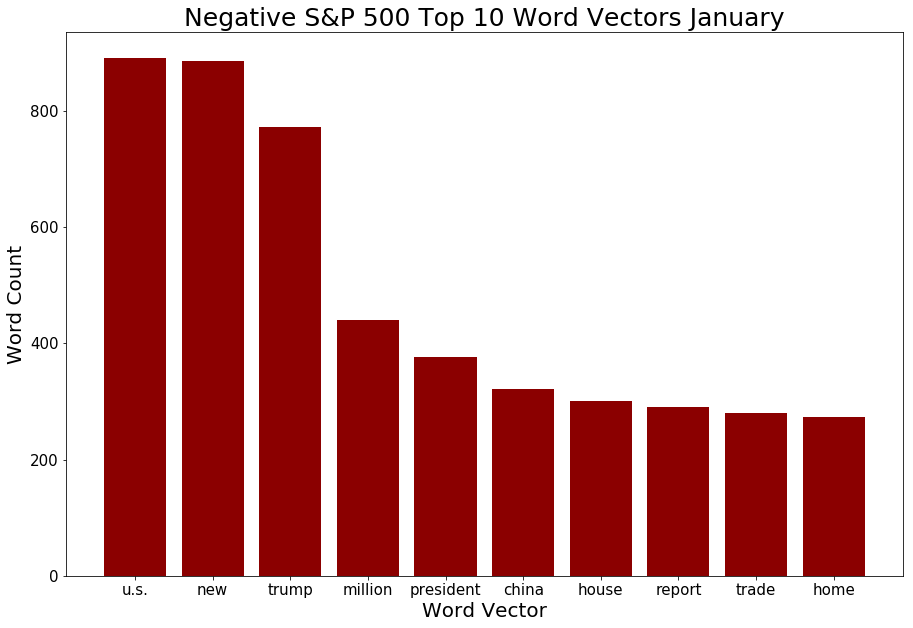

In [18]:
plt.figure(figsize=(15,10)) #Figsize
plt.bar(x=FreqDist_negative.keys(),
        height=FreqDist_negative.values(),
        color='darkred') #Bar graph
plt.tick_params(labelsize=15)
plt.xlabel('Word Vector',size=20) #X label
plt.ylabel('Word Count',size=20) #Y label
plt.title('Negative S&P 500 Top 10 Word Vectors January', size=25) #Title


As we can see from the above graphs there does not seem to be a difference really at all in the most common words for a positive SP500 day vs. a negative. In fact, the top words are exactly the same (except for the word home), but the word count values differ in order. The order is as follows:


Positive:
    
    1. new
    2. u.s
    3. trump
    4. million
    5. president
    6. china
    7. house
    8. report
    9. deal
    10. trade


Negative:  

    1. u.s
    2. new
    3. trump
    4. million
    5. president
    6. china
    7. house
    8. report
    9. trade
    10. home
Next lets dive into the whole data set to look at it's frequency distribution of words. 

In [19]:
tokenized_df=df['Text'].apply(nltk.word_tokenize)
df_tokens=[] 
for x in tokenized_df: #Stop word removal along with lower casing the tokens
    for y in x:
        if y not in stopwords_list:
            df_tokens.append(y.lower())

In [20]:
df_freq_dist=dict(FreqDist(df_tokens).most_common(10))

In [21]:
df_freq_dist

{'new': 2688,
 'u.s.': 2493,
 'trump': 2069,
 'million': 1163,
 'president': 1058,
 'china': 941,
 'house': 919,
 'report': 856,
 'trade': 782,
 'deal': 745}

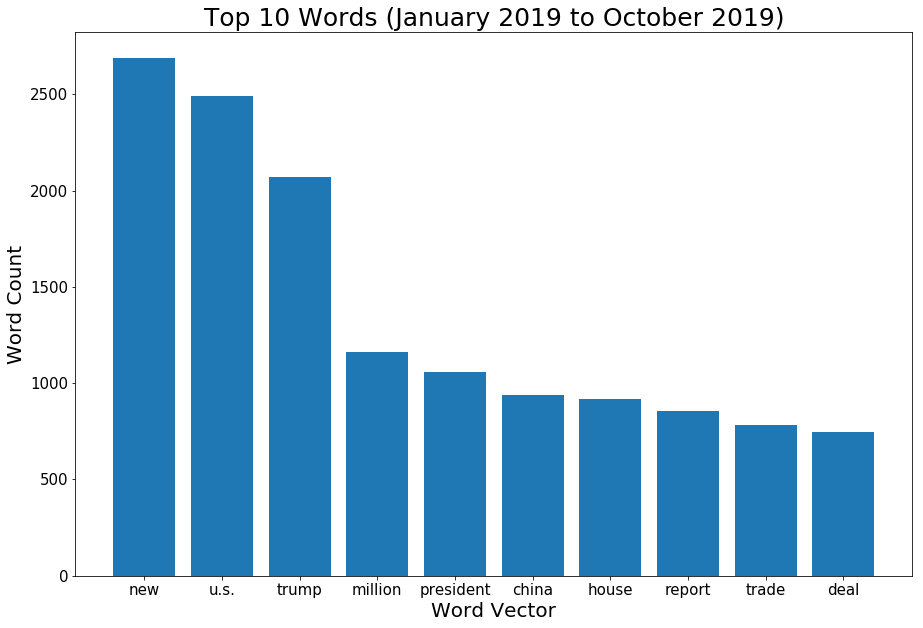

In [24]:
plt.figure(figsize=(15,10)) #Figsize
plt.bar(x=df_freq_dist.keys(),
        height=df_freq_dist.values()) #Bar graph
plt.tick_params(labelsize=15)
plt.xlabel('Word Vector',size=20) #X label
plt.ylabel('Word Count',size=20) #Y label
plt.title('Top 10 Words (January 2019 to October 2019)', size=25) #Title
plt.show()

We see the same exact words as the negative frequency distribution except for the word 'home' and the positive list has the word 'trade'. Some of the immediate thoughts and take aways from these graphs would be the general theme of US news over the past year. The day to day news and social media always is covering either Trump or China. Both of these topics make up the rest of the freq distribution word values.   

Side note: It would be very interesting to compare the frequency distribution of say the last year of Obamas presidency to see if his name ranks as highly as Trumps did. I believe the presidency will be covered and under as much scrutinity as Trump for the rest of US history. The biggest reason for this is due to the interconnectedness of the US due to social media and technology. 

Since Freq Dist word counts did not really show us all that much, I decided to get the actual values of the normalized frequency distribution for each word. 

In [20]:
df_tokens_freq_dist=FreqDist(df_tokens)
total_word_count = sum(df_tokens_freq_dist.values())
wsj_top_50 =df_tokens_freq_dist.most_common(50)
print("Word\t\t\tNormalized Frequency")
for word in wsj_top_50:
    normalized_frequency = word[1] / total_word_count
    print("{} \t{:.4}".format(word[0], normalized_frequency))

Word			Normalized Frequency
new 	0.008286
u.s. 	0.007685
trump 	0.006378
million 	0.003585
president 	0.003261
china 	0.002901
house 	0.002833
report 	0.002639
trade 	0.00241
deal 	0.002296
could 	0.002241
company 	0.002207
says 	0.002139
market 	0.002124
home 	0.00205
year 	0.002038
two 	0.001994
one 	0.001945
companies 	0.001942
first 	0.001914
week 	0.00188
stock 	0.001837
world 	0.001825
billion 	0.001819
former 	0.001816
big 	0.001782
fed 	0.001742
federal 	0.001695
york 	0.001683
business 	0.001674
state 	0.001612
would 	0.001578
people 	0.001566
u.s 	0.00156
sales 	0.00155
investors 	0.001547
growth 	0.001517
years 	0.00148
tech 	0.001464
chief 	0.001458
today 	0.001433
amazon 	0.001421
ceo 	0.001421
stocks 	0.00139
facebook 	0.00139
back 	0.001384
government 	0.001372
logistics 	0.001338
global 	0.001325
next 	0.001288


After looking at the most common words in the WSJ headline and subheaders, I have decided to take out says and said. I will add these to the stop words list.  
In addition, just a few observations:
    1. New, U.S, Trump are the most common words for both positive and negative SP 500 days.
    2. The only country besides the US that appeared in the bag of words was China. This is expected as over the past year a trade deal with China has been at the forefront of the American agenda. 
    3. The words report and house appear in all three charts. It is interesting that Mueller does not appear as well considering a lot of the report tokens I would imagine have to deal with the investigation conducted by Robert Muller.
    
Next I would like to do a little bit of EDA by further investigating the differences in the top 100 words between negative and positive changes in the SP 500. In addition, I would like to look into all the text that had report in it to see if my Robert Mueller hunch is correct.

## EDA Abs. Difference 

The following EDA is a absolute difference metric I created from the negative and positive frequency distributions. 

In [25]:
top_100_negative=dict(FreqDist(negative_tokens).most_common(100)) #Creating a dictionary of top 100 negative words

In [26]:
top_100_positive=dict(FreqDist(positive_tokens).most_common(100)) #Creating a dictionary of top 100 positive words

In [27]:
neg_100_df=pd.DataFrame.from_dict(top_100_negative, orient='index', columns=['Count']) #Dataframe creation

In [28]:
pos_100_df=pd.DataFrame.from_dict(top_100_positive, orient='index',columns=['Count']) #Dataframe creation

In [29]:
pos_and_neg=pd.merge(neg_100_df,pos_100_df,left_index=True,right_index=True) #Merging the two positive and negative dataframes

In [30]:
pos_and_neg.columns=['Negative','Positive'] #Renaming columns

In [31]:
pos_and_neg['Abs. Diff']= abs(pos_and_neg['Negative']-pos_and_neg['Positive']) #Creating absolute difference calculation

In [32]:
pos_and_neg.sort_values('Abs. Diff',ascending=False, inplace=True) #Sorting for highest absolute difference

In [33]:
pos_and_neg.head(25)

,Negative,Positive,Abs. Diff
new,886,1802,916
u.s.,891,1602,711
trump,772,1297,525
house,300,619,319
president,377,681,304
china,321,620,299
million,440,723,283
report,290,566,276
deal,240,505,265
year,201,460,259


88 of the top 100 positive change SP 500 days were also in the negative list. Now of these 88 I would like to do a absolute value to see which words have the most affect qoute on qoute.

Below is a graph of the above dataframe. Visually it represents the Positive vs. negative word frequency along with the absolute difference. One thing to note is the first company that has shown up through the analysis. Amazon, due to their new coveted HQ location selection proces, appeared quiet frequently over the past year.  

Text(0.5, 1.0, 'Absolute Difference')

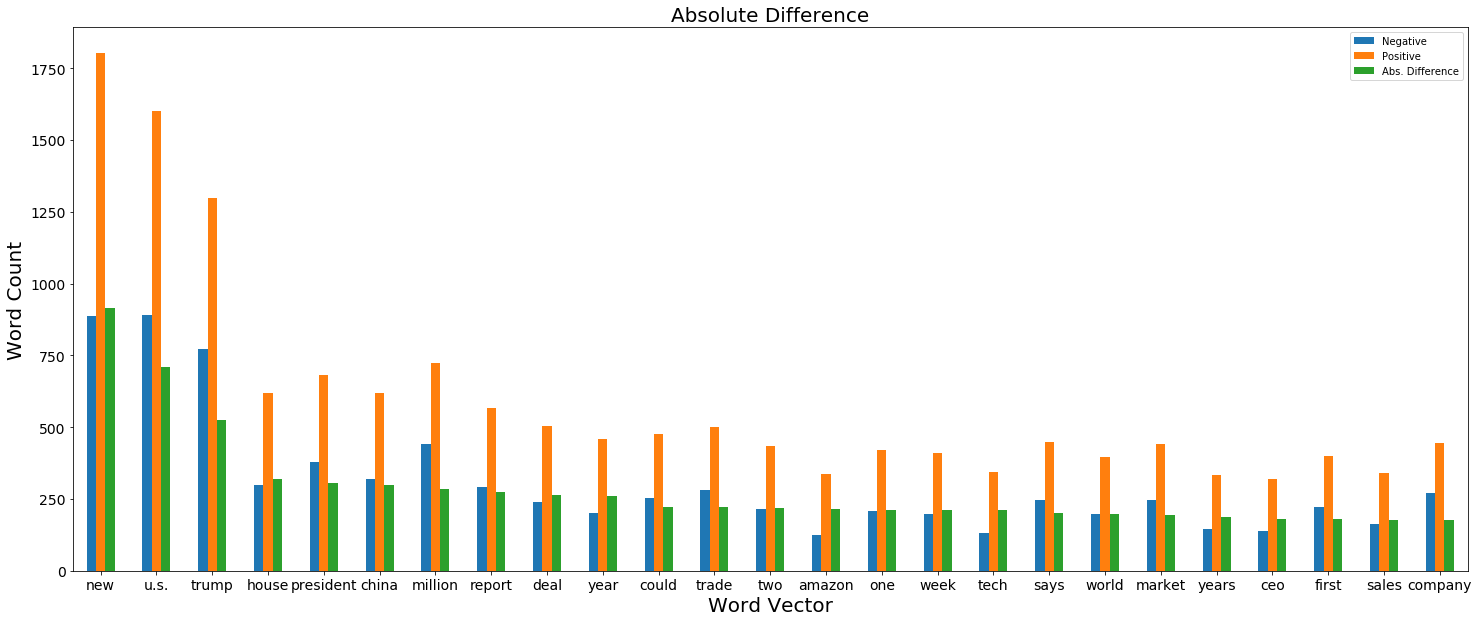

In [49]:
index = pos_and_neg.index[:25]
df_bar = pd.DataFrame({'Negative': pos_and_neg['Negative'][:25], 'Positive': pos_and_neg['Positive'][:25], 'Abs. Difference': pos_and_neg['Abs. Diff'][:25]}, index=index)
ax = df_bar.plot.bar(rot=0,figsize=(25,10))
plt.xlabel('Word Vector',size=20) #X label
plt.ylabel('Word Count',size=20)
plt.tick_params(labelsize=14)
plt.title('Absolute Difference',size=20)

## EDA Word Clouds

A very visually appealing way to display text data is through word clouds. I decided to do a word cloud for all of the data. Below is the result.

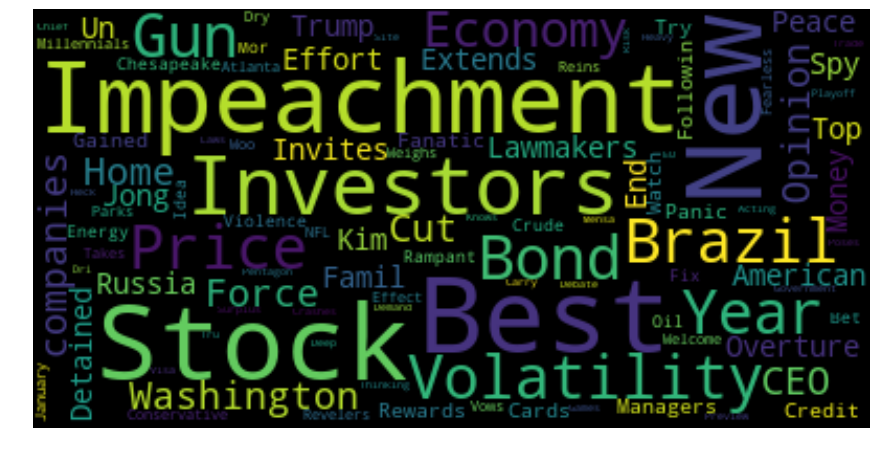

In [31]:
text= str(df['Text']) #Changing data type to easily integrate with wordcloud pakcage

wordcloud = WordCloud(stopwords=stopwords_list,max_font_size=50, max_words=100, background_color="black").generate(str(text)) #Creating wordcloud

# Display the generated image:
plt.figure(figsize=(15,15)) #figsize
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

Top words seem to be American, Trump, Fire, California, Rate, Brazil, etc. This is very interesting considering almost every word on here can be linked to a general year long topic that has constantly beent talked about. 

For example, California and their wild fires has been all over the news the past two years. In addition, Fed and Rate bouth show up which is in regards to the federal reserve and their rate increases or cuts. Note, Apple is the only company that showed up in this word cloud which is very interesting. So far only Apple and Amazon have showed up. May be interesting to do some more research into both of their stock prices in regards to negative and positive SP500 market days. 

Another cool representation of the text is by using a pre-existing image and then overlay your wordclouds in said image. Below is my attempt at this through using a WSJ image I found off of google. 

In [55]:
wsj_mask= np.array(Image.open(r'wsj-social-share_edited.png')) #importing image

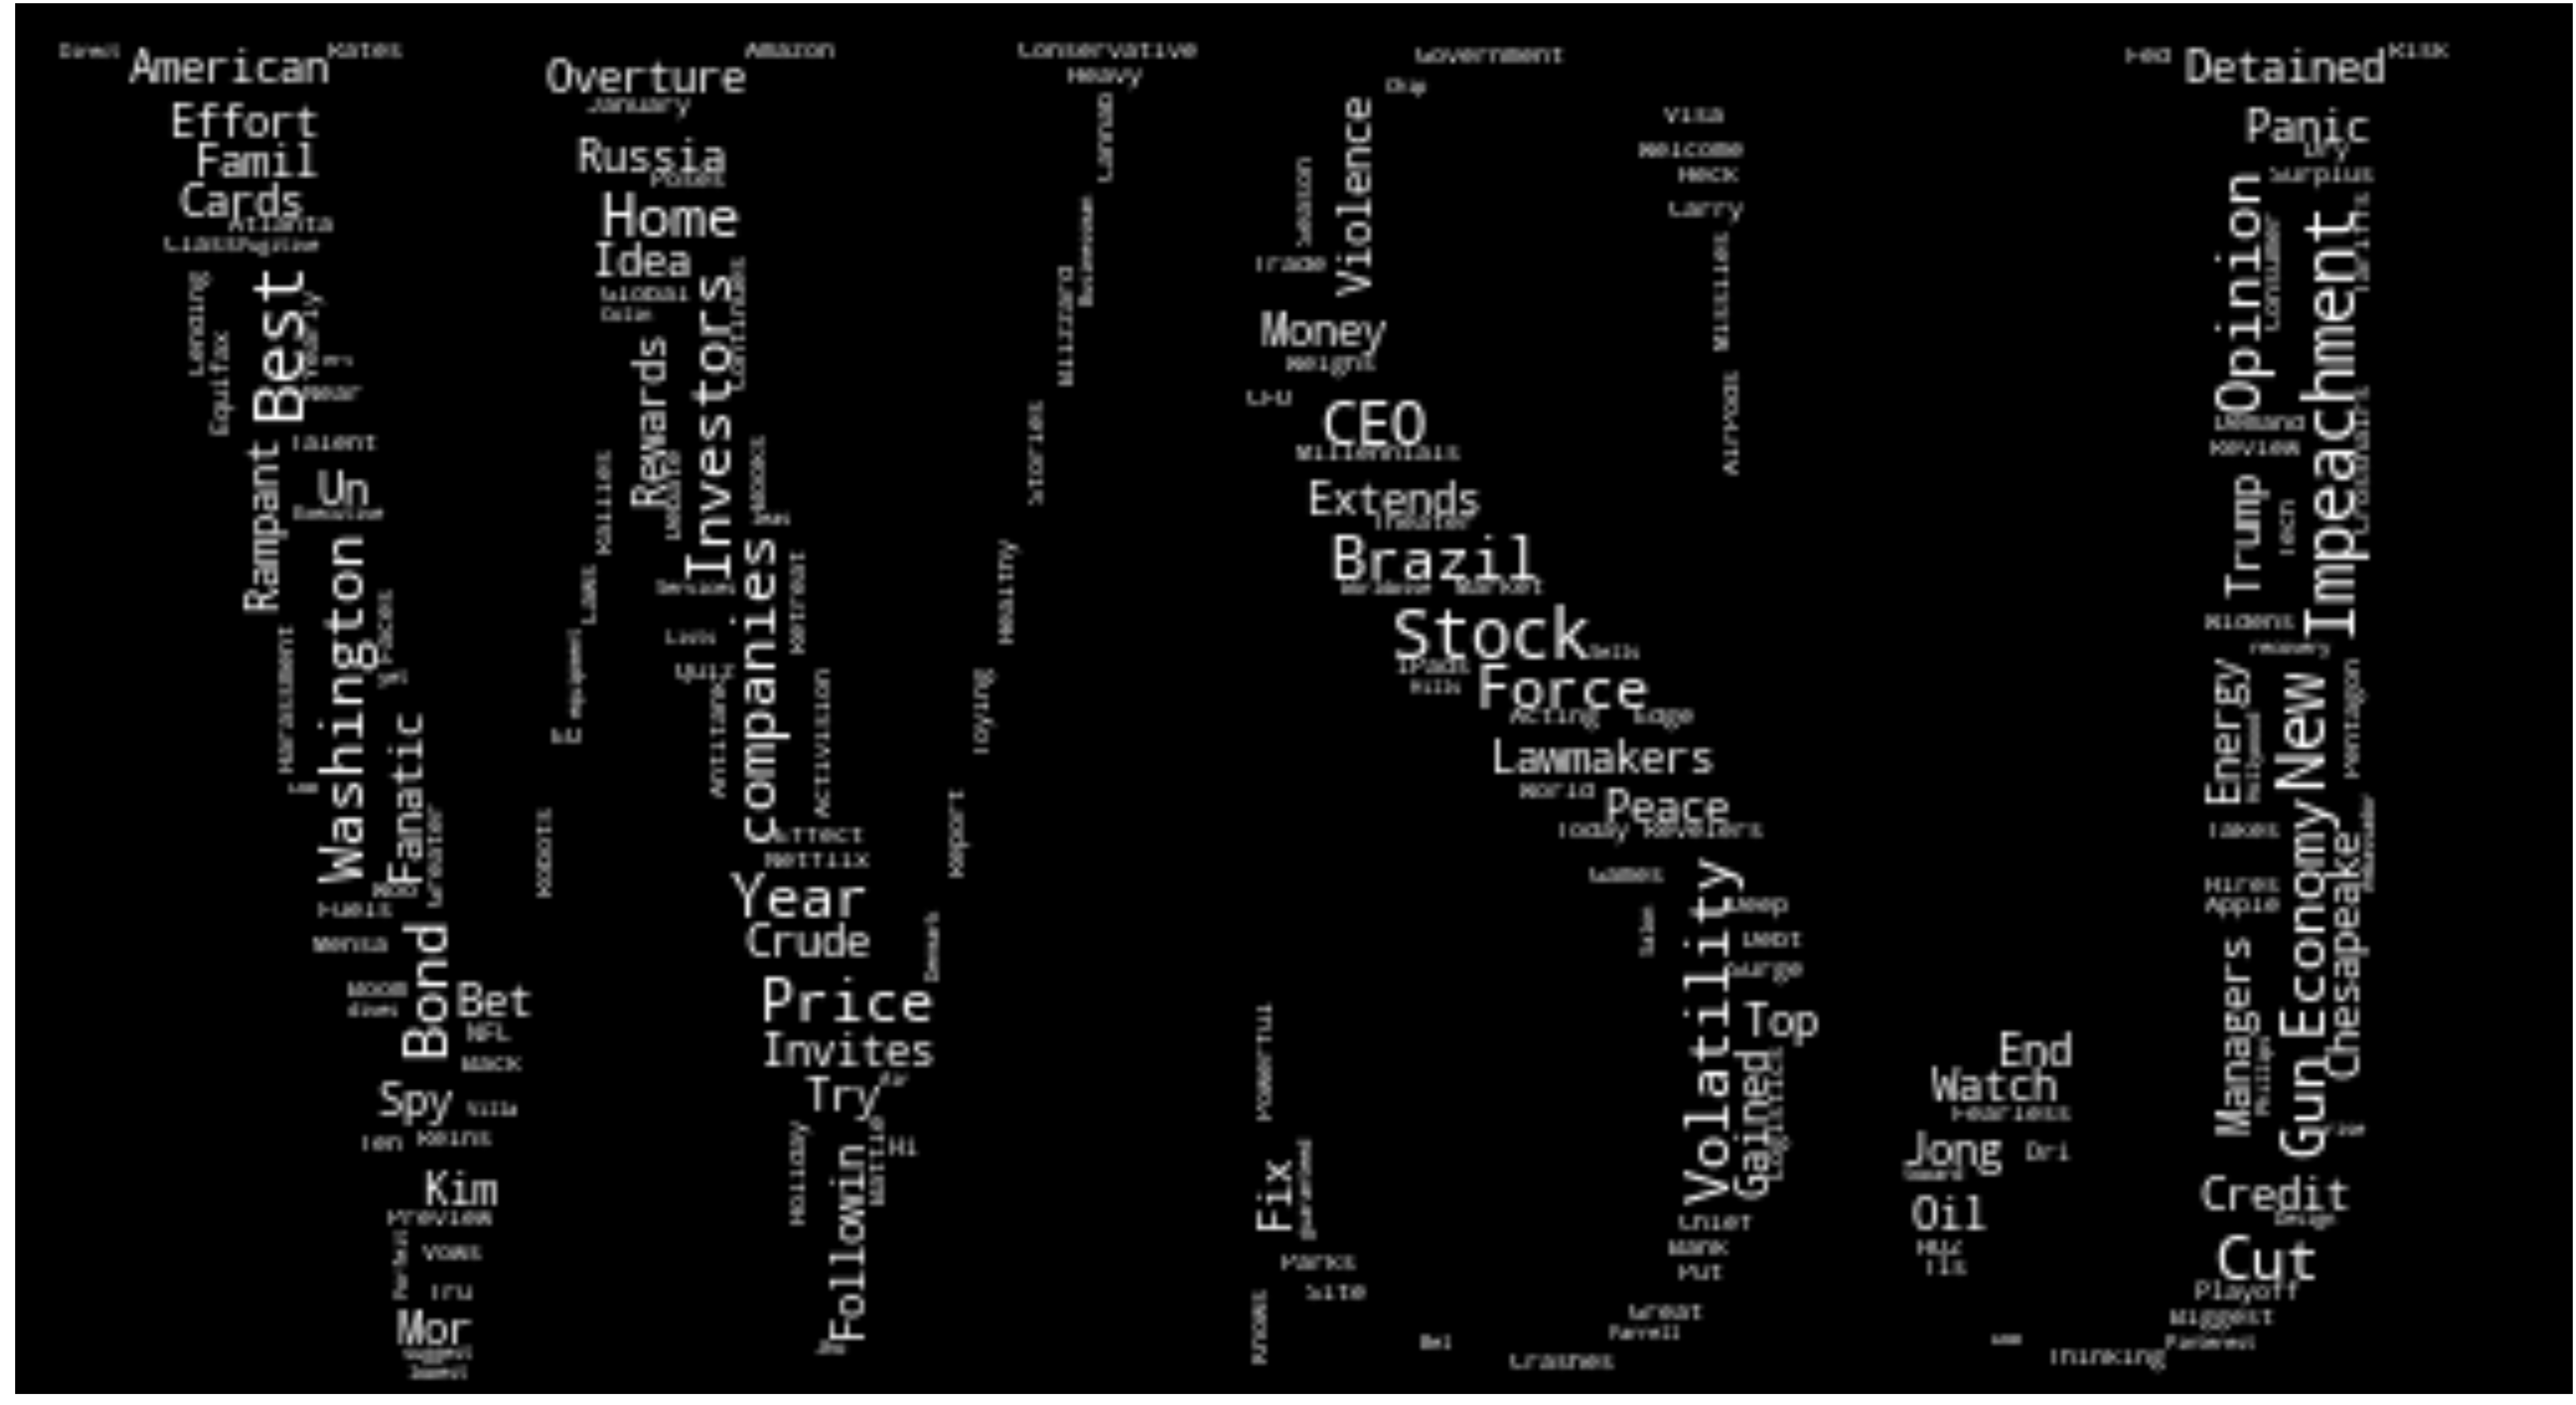

In [56]:
text= df['Text']

wordcloud = WordCloud(stopwords=stopwords_list, max_words=200, background_color="black",mask=wsj_mask, color_func=(lambda *args, **kwargs: "white")).generate(str(text))

# Display the generated image:
plt.figure(figsize=(100,100))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## EDA Time Series Modeling

This section is just a quick look into a bit of time series modeling of the SP500 over the last year. Figured this would be a nice visual to show how part of the economy has performed over the past year. 

In [33]:
sp_500=pd.read_csv('S&P 500 Data.csv') #df read

In [34]:
sp_500.set_index(sp_500['Date'],inplace=True) #Date Time index setting

In [35]:
sp_500.drop(['Date'],axis=1,inplace=True) #Dropping Date column

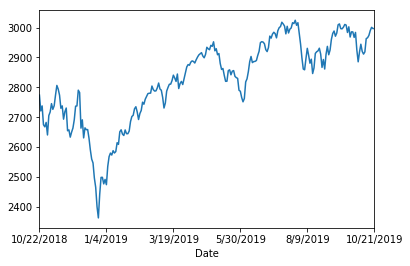

In [36]:
sp_500['Open'].plot() #Time series 

Decided to take the close of each day and subtract the open, it appears from the graph below the data is very stationary when you do this. 

In [37]:
sp_500['Change']=sp_500['Close']-sp_500['Open']

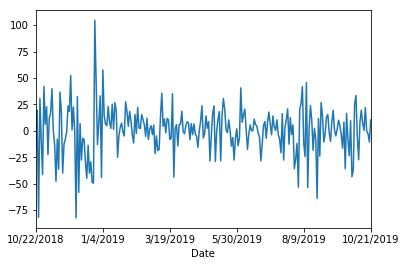

In [38]:
sp_500['Change'].plot()